### Instalação dos pacotes necessários (reiniciar o ambiente após executar, caso executado no colab)

In [ ]:
!pip install surprise

### Importação das bibliotecas necessárias

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from surprise import KNNWithMeans
from surprise import Dataset
from surprise import accuracy
from surprise import Reader
import os
from surprise.model_selection import train_test_split
from sklearn.decomposition import TruncatedSVD

from google.colab import files

### Importação dos Raw Datasets

In [4]:
upload = files.upload()

Saving DNC_order_items_dataset.csv to DNC_order_items_dataset.csv
Saving DNC_order_reviews_dataset.csv to DNC_order_reviews_dataset.csv
Saving DNC_orders_dataset.csv to DNC_orders_dataset.csv
Saving DNC_products_dataset.csv to DNC_products_dataset.csv


In [29]:
df1 = pd.read_csv('/content/DNC_order_items_dataset.csv', index_col="Unnamed: 0")
df2 = pd.read_csv('/content/DNC_order_reviews_dataset.csv', index_col="Unnamed: 0")
df3 = pd.read_csv('/content/DNC_orders_dataset.csv', index_col="Unnamed: 0")
df4 = pd.read_csv('/content/DNC_products_dataset.csv', index_col="Unnamed: 0")

### Análise EDA

In [30]:
df1.head(1)

,order_id,order_item_id,product_id,price
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,58.9


In [31]:
df2.head(1)

,review_id,order_id,review_score
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4


In [32]:
df3.head(1)

,order_id,customer_id,order_status
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered


In [33]:
df4.head(1)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,225.0,16.0,10.0,14.0


In [34]:
dfOrders = pd.merge(df3, df2, on="order_id")
dfOrders = pd.merge(dfOrders, df1, on="order_id")
dfOrders = pd.merge(dfOrders, df4, on="product_id")

In [229]:
dfOrders.head()

,order_id,customer_id,order_status,review_id,review_score,order_item_id,product_id,price,product_category_name,product_name_lenght,product_description_lenght,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,a54f0611adc9ed256b57ede6b6eb5114,4,1,87285b34884572647811a353c7ac498a,29.99,utilidades_domesticas,40.0,268.0,500.0,19.0,8.0,13.0
1,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,b46f1e34512b0f4c74a72398b03ca788,4,1,87285b34884572647811a353c7ac498a,29.99,utilidades_domesticas,40.0,268.0,500.0,19.0,8.0,13.0
2,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,dc90f19c2806f1abba9e72ad3c350073,5,1,87285b34884572647811a353c7ac498a,29.99,utilidades_domesticas,40.0,268.0,500.0,19.0,8.0,13.0
3,bfc39df4f36c3693ff3b63fcbea9e90a,53904ddbea91e1e92b2b3f1d09a7af86,delivered,1bafb430e498b939f258b9c9dbdff9b1,3,1,87285b34884572647811a353c7ac498a,29.99,utilidades_domesticas,40.0,268.0,500.0,19.0,8.0,13.0
4,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,8d5266042046a06655c8db133d120ba5,4,1,595fac2a385ac33a80bd5114aec74eb8,118.70,perfumaria,29.0,178.0,400.0,19.0,13.0,19.0


In [219]:
dfOrders.describe()

,review_score,order_item_id,price,product_name_lenght,product_description_lenght,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,112372.000000,112372.000000,112372.000000,110774.000000,110774.000000,112354.000000,112354.000000,112354.000000,112354.000000
mean,4.032473,1.196010,120.378962,48.777583,786.793932,2090.610882,30.152198,16.576811,23.001210
std,1.387849,0.691243,182.152386,10.025179,651.609498,3748.608093,16.139323,13.437792,11.707552
min,1.000000,1.000000,0.850000,5.000000,4.000000,0.000000,7.000000,2.000000,6.000000
25%,4.000000,1.000000,39.900000,42.000000,348.000000,300.000000,18.000000,8.000000,15.000000
50%,5.000000,1.000000,74.900000,52.000000,601.000000,700.000000,25.000000,13.000000,20.000000
75%,5.000000,1.000000,134.900000,57.000000,985.000000,1800.000000,38.000000,20.000000,30.000000
max,5.000000,21.000000,6735.000000,76.000000,3992.000000,40425.000000,105.000000,105.000000,118.000000


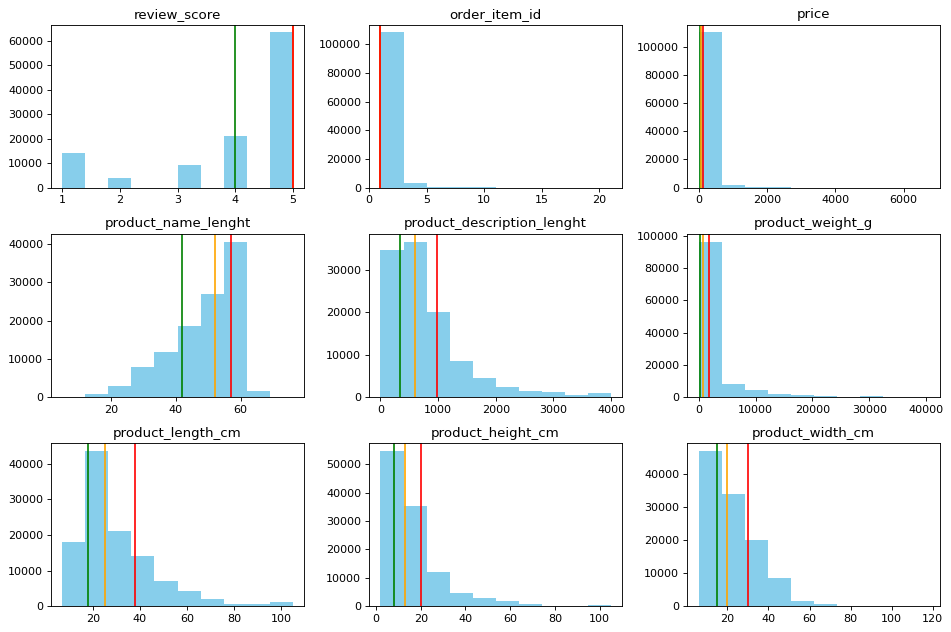

In [228]:
n_cols = 3
n_rows = 3
fig, ax = plt.subplots(n_rows, n_cols, tight_layout=True, figsize=(12, 8), dpi=80)

dfColumns = dfOrders.select_dtypes(include=np.number).columns

i = 0
for row in ax:
  for col in row:
    col.hist(dfOrders[dfColumns[i]], color = "skyblue")
    col.set_title(dfColumns[i])
    col.axvline(dfOrders[dfColumns[i]].quantile(0.25), 0, 1, color='green')
    col.axvline(dfOrders[dfColumns[i]].quantile(0.5), 0, 1, color='orange')
    col.axvline(dfOrders[dfColumns[i]].quantile(0.75), 0, 1, color='red')
    i += 1

> 1. (review_score) A grande maioria das recomendações são de pelo menos 4 estrelas
2. (order_item_id) As compras geralmente possuem um item
1. (price) A maior parte das compras são de produtos com valor menor que 100 reais
2. (product_name_length) Os produtos mais comprados possuem entre 42 e 57 letras de nome
3. (product_description_lenght) Os produtos mais comprados possuem entre 348 e 985 letras de descrição
4. (product_weight_g) Os produtos mais comprados possuem entre 300 a 1800 g de peso
5. (product_length_cm) Os produtos mais comprados possuem entre 18 e 38 cm de comprimento
6. (product_height_cm) Os produtos mais comprados possuem entre 8 e 20 cm de altura
7. (product_width_cm) Os produtos mais comprados possuem entre 15 e 30 cm de largura

In [231]:
print(dfOrders['review_score'].isna().sum())
print(dfOrders['customer_id'].isna().sum())
print(dfOrders['product_id'].isna().sum())

0
0
0


> As colunas mais importantes para a implementação do modelo não possuem valores nulos

### Aplicação dos algorítimos de recomendação

#### Recomendador baseado em popularidade

Criação de um subconjunto com produtos avaliados mais de 50 vezes. Este será o nosso limite

In [40]:
# Dataframe com produtos com mais de 50 avaliações
new_df = dfOrders.groupby("product_id").filter(lambda x: x['review_score'].count() >= 50)

# # Criação de um novo DataFrame com classificação média e número de classificações por produto
ratings_df = pd.DataFrame(new_df.groupby('product_id').review_score.mean())

# # Adicionando coluna com número de avaliações por produto
ratings_df['rating_counts'] = new_df.groupby('product_id').review_score.count()

# # Visualização dos 5 produtos mais bem avaliados (número de avaliações)
ratings_df.sort_values(by = 'rating_counts', ascending = False).head(5)

,review_score,rating_counts
product_id,,
aca2eb7d00ea1a7b8ebd4e68314663af,4.019084,524
422879e10f46682990de24d770e7f83d,3.946502,486
99a4788cb24856965c36a24e339b6058,3.898340,482
389d119b48cf3043d311335e499d9c6b,4.117647,391
368c6c730842d78016ad823897a372db,3.922680,388


Em seguida, definiremos uma função para calcular uma média ponderada que pega o número total de votos e o limite (50) e o multiplica pela média global e pela média do produto. A fórmula é: (v / (v + m) * R) + (m / (m + v) * C)

- (v) votos do produto;
- (m) votos mínimos GERAL;

- (R) avaliação média do produto;
- (C) avaliação GERAL de produtos

In [41]:
# Média Global das review_score
C = ratings_df['review_score'].mean()

# Limite mínimo para ser elegível ao ranking
m = ratings_df.rating_counts.min()

# Função que calcula a média ponderada de cada item
def weighted_rating (x, m = m, C = C):
  v = x['rating_counts']
  R = x['review_score']
  # Calcula média ponderada
  return (v/(v+m) * R) + (m/(v+m) * C)

# Adiciona a 'pontuação' calculada com weighted_rating() ao dataframe
ratings_df['score'] = ratings_df.apply(weighted_rating, axis=1)

# Resultado final com os 15 produtos mais populares
ratings_df.sort_values(by='score', ascending=False).head(15)

,review_score,rating_counts,score
product_id,,,
73326828aa5efe1ba096223de496f596,4.833333,54,4.450744
6a8631b72a2f8729b91514db87e771c0,4.709677,62,4.409619
e0cf79767c5b016251fe139915c59a26,4.477941,136,4.359556
fbc1488c1a1e72ba175f53ab29a248e8,4.620690,58,4.350716
629e019a6f298a83aeecc7877964f935,4.561644,73,4.348596
5f504b3a1c75b73d6151be81eb05bdc9,4.555556,63,4.326348
f7a17d2c51d9df89a4f1711c4ac17f33,4.546875,64,4.323486
363218ba55c610b750224f90bdd34be1,4.465116,86,4.307922
d696750e550fd0f733979dd7e5dff921,4.526316,57,4.297919


#### Filtragem colaborativa (recomendação item-item)

In [45]:
# Lendo o dataset
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(new_df[['customer_id', 'product_id', 'review_score']], reader)

# Split dos dados
trainset, testset = train_test_split(data, test_size=0.3, random_state=10)

# Criação de um modelo baseado em item (user_based true / false para alternar entre filtragem colaborativa baseada em usuário ou baseada em item)
algo = KNNWithMeans(k=5, sim_options={'user_based': False})
algo.fit(trainset)

# Teste do modelo
test_pred = algo.test(testset)

Computing the msd similarity matrix...
Done computing similarity matrix.


In [46]:
algo.get_neighbors(1, 10)

[41, 78, 82, 3, 59, 0, 2, 4, 5, 6]

In [47]:
# buscando os ID dos produtos recomendados com base no produto selecionado 
ratings_df.iloc[[41, 78, 82, 3, 59, 0, 2, 4, 5, 6]].index

Index(['3fbc0ef745950c7932d5f2a446189725', '703d742887bb9267f89b675608ba7aa0',
       '777d2e438a1b645f3aec9bd57e92672c', '06edb72f1e0c64b14c5b79353f7abea3',
       '53759a2ecddad2bb87a079a1f1519f73', '0152f69b6cf919bcdaf117aa8c43e5a2',
       '06c6e01186af8b98ee1fc9e01f9471e9', '08574b074924071f4e201e151b152b4e',
       '0a57f7d2c983bcf8188589a5fea4a8da', '0aabfb375647d9738ad0f7b4ea3653b1'],
      dtype='object', name='product_id')

#### Sistema de fatoração de matriz (algoritmo SVD)

Levando em consideração customer_id e product_id (utilizando o review_score para validar correlação com base na avaliação do cliente)

In [232]:
# Cria-se uma matriz (utilizando com 50 mil linhas por motivo de uso computacional)
new_df1 = new_df.head(50000)
ratings_matrix = new_df1.pivot_table(values='review_score', index='customer_id', columns='product_id', fill_value=0)
ratings_matrix.head()

# Transposta da matriz
X = ratings_matrix.T
X.head()

customer_id,00066ccbe787a588c52bd5ff404590e3,000e943451fc2788ca6ac98a682f2f49,000fd45d6fedae68fc6676036610f879,001028b78fd413e19704b3867c369d3a,0015f7887e2fde13ddaa7b8e385af919,0017a0b4c1f1bdb9c395fa0ac517109c,0019c9aaad15b043c48f0a1180f22ce8,002d358e2462f87678443706cbf2eb21,003bdf7fd8312f9d14a4b979f3747334,00426311a53f3c052943c88b692a3be2,...,ffcbcec4480d074ffd50398e66bff27c,ffd940dedc35e4f459eddfa41291e824,ffdaaad4323306777060ca43b3f87e7f,ffdd80d8f3655192a9d2a38d5b18732c,ffde64401f7cb62d2e8696d9467c781d,ffe1eab23bff108bf37c973b05d4e9ba,ffeaa6d37b3691d54a01171f6562f44f,ffed5d4f6245fe13cd57054621eec36a,fff212062d600f2e1d53f3c5d4a25138,fffb97495f78be80e2759335275df2aa
product_id,,,,,,,,,,,,,,,,,,,,,
0152f69b6cf919bcdaf117aa8c43e5a2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
054515fd15bc1a2029f10de97ffa9120,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
06c6e01186af8b98ee1fc9e01f9471e9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
06edb72f1e0c64b14c5b79353f7abea3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
08574b074924071f4e201e151b152b4e,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [233]:
# Redução de dimensionalidade com Truncated SVD
SVD_model = TruncatedSVD(n_components=10)
decomposed_matrix = SVD_model.fit_transform(X)
decomposed_matrix.shape

# Matriz de Correlação
correlation_matrix = np.corrcoef(decomposed_matrix)
correlation_matrix.shape

# Indice do produto da matriz transposta (resultante do pivot_table)
indiceProduto = 3

# Correlação para todos os itens com o item comprado por este cliente, com base em itens avaliados por outras pessoas de clientes que compraram o mesmo produto
correlation_product_ID = correlation_matrix[indiceProduto]
correlation_product_ID.shape

(175,)

In [234]:
# Filtro pelos registros com correlação maior que 0.7 (indicando alta correlação entre os produtos)
Recommend = list(X.index[correlation_product_ID > 0.7])

# Remove o item já comprado pelo cliente
Recommend.remove(X[indiceProduto:indiceProduto + 1].index[0])

# Top 10 produtos similares ao produto 06c6e01186af8b98ee1fc9e01f9471e9 recomendados para esse cliente
Recommend[0:10]

['19421075ae0b585f2dc13ff149e2119d',
 '19c91ef95d509ea33eda93495c4d3481',
 '22c5ddc22ea8cae84fc9917def682dc6',
 '5d66715cc928aadd0074f61332698593',
 '5f504b3a1c75b73d6151be81eb05bdc9',
 '629e019a6f298a83aeecc7877964f935',
 '64fb265487de2238627ce43fe8a67efc',
 'bee2e070c39f3dd2f6883a17a5f0da45',
 'dbb67791e405873b259e4656bf971246']